Optimal Total Value: 1000.0 

Total Weight of Selected Items: 100.0 

Selected Items (Index, Fraction): [(1, 10.0)] 


Model Summary:

Fractional_Knapsack_Problem:
MAXIMIZE
100*x_0 + 280*x_1 + 120*x_2 + 300*x_3 + 450*x_4 + 130*x_5 + 150*x_6 + 200*x_7 + 240*x_8 + 160*x_9 + 0
SUBJECT TO
Weight_Constraint: 10 x_0 + 40 x_1 + 20 x_2 + 50 x_3 + 60 x_4 + 15 x_5
 + 25 x_6 + 30 x_7 + 45 x_8 + 35 x_9 <= 100

VARIABLES
x_0 Continuous
x_1 Continuous
x_2 Continuous
x_3 Continuous
x_4 Continuous
x_5 Continuous
x_6 Continuous
x_7 Continuous
x_8 Continuous
x_9 Continuous



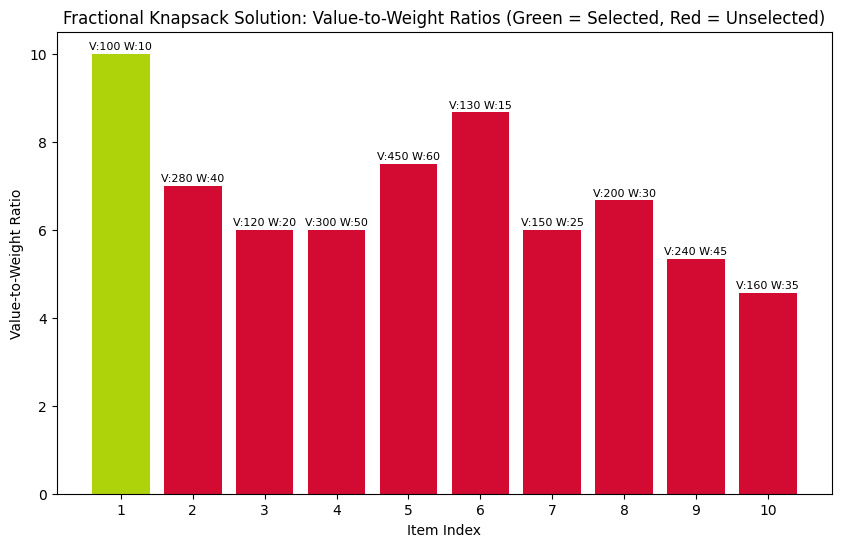

In [5]:
# !pip install pulp
from pulp import *
import matplotlib.pyplot as plt

def solve_fractional_knapsack_with_pulp(values, weights, max_weight, show_model=False, show_plot=True):
    """
    Solve the Fractional Knapsack Problem using linear programming with PuLP and plot the results.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - max_weight (float): Maximum weight capacity of the knapsack.
    - show_model (bool): If True, prints the linear programming model used to solve the knapsack problem.
    - show_plot (bool): If True, displays a bar plot of value-to-weight ratios.
    """

    # Get the number of items
    n = len(values)

    # Initialize the problem
    knapsack = LpProblem("Fractional_Knapsack_Problem", LpMaximize)

    # Create continuous decision variables x_i for each item (fraction of each item)
    x = LpVariable.dicts("x", (i for i in range(n)), lowBound=0)  # No upper bound for fractional items

    # Objective function: Maximize the total value
    knapsack += lpSum(values[i] * x[i] for i in range(n)), "Total_Value"

    # Constraint: The total weight of selected items should not exceed max_weight
    knapsack += lpSum(weights[i] * x[i] for i in range(n)) <= max_weight, "Weight_Constraint"

    # Solve the problem
    knapsack.solve()

    # Retrieve and print the solution
    if knapsack.status == LpStatusOptimal:
        total_value = value(knapsack.objective)
        total_weight = sum(weights[i] * value(x[i]) for i in range(n))
        selected_items = [(i + 1, value(x[i])) for i in range(n) if value(x[i]) > 0]  # Include fractions

        print("Optimal Total Value:", total_value, "\n")
        print("Total Weight of Selected Items:", total_weight, "\n")
        print("Selected Items (Index, Fraction):", selected_items, "\n")  # Indexes starting from 1

        # Show the model summary if show_model is set to True
        if show_model:
            print("\nModel Summary:\n")
            print(knapsack)

        # Plot the results if show_plot is set to True
        if show_plot:
            plot_knapsack_solution(values, weights, selected_items)
    else:
        print("No optimal solution found.")

def plot_knapsack_solution(values, weights, selected_items):
    """
    Plots the selected and unselected items in the fractional knapsack problem, showing value-to-weight ratios.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - selected_items (list of tuples): (Index, Fraction) of selected items.
    """
    n = len(values)
    item_indices = list(range(1, n + 1))  # Start items from index 1

    # Calculate value-to-weight ratios
    ratios = [values[i] / weights[i] for i in range(n)]

    # Define colors for selected vs. unselected items
    colors = ['#afd30b' if any(i + 1 == item[0] for item in selected_items) else '#d30b32' for i in range(n)]

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the value-to-weight ratio
    ax.bar(item_indices, ratios, color=colors)
    ax.set_xticks(item_indices)  # Ensure x-axis has sequential indices (1, 2, 3, ...)
    ax.set_xlabel("Item Index")
    ax.set_ylabel("Value-to-Weight Ratio", color='black')
    ax.set_title("Fractional Knapsack Solution: Value-to-Weight Ratios (Green = Selected, Red = Unselected)")

    # Display value and weight on each bar
    for i in range(n):
        ax.text(item_indices[i], ratios[i] + 0.1, f"V:{values[i]} W:{weights[i]}", ha='center', fontsize=8)

    plt.show()

# Example usage
if __name__ == "__main__":
    values = [100, 280, 120, 300, 450, 130, 150, 200, 240, 160]
    weights = [10, 40, 20, 50, 60, 15, 25, 30, 45, 35]
    max_weight = 100

    solve_fractional_knapsack_with_pulp(values, weights, max_weight, show_model=True, show_plot=True)